# requests 객체와 BeutifulSoup, css selector 사용해서 params의 검색결과에 해당하는 링크 가져오기.

In [122]:
# urllib로 받아오면 byte형태로 받아와서 인코딩해줘야하는데 requests는 안해도됨.

import requests
from bs4 import BeautifulSoup

In [123]:
# headers가없으면 bot인줄알고 막는데, user-agent를 입력해주면 일반 사용자로인식해서
# 접근 가능해짐.

headers = {
    "user-agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36"
}

# https://www.google.co.kr/search?q=%ED%95%9C%EA%B8%80
params= {
    "q" : "한글"
}

url = "https://www.google.co.kr/search"

In [124]:
# urllib쓰더라도 겁나 뭐 설정 많이했어야햇는데.
# request만 쓰면 끝.

html = requests.get(url, params=params, headers=headers)

In [125]:
# requets로 받아온 html은 자동 encoding되어있음.

html.encoding

'UTF-8'

'<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="ko"><head><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><link href="/images/branding/product/ico/googleg_lodp.ico" rel="shortcut icon"><meta content="origin" name="referrer"><title>한글 - Google 검색</title><script nonce="aKxdLJmGsVFYg8QOtUbRfQ==">(function(){window.google={kEI:\'SlNNW6P4PI_s-Qb4qKvQDA\',kEXPI:\'31\',authuser:0,kscs:\'c9c918f0_SlNNW6P4PI_s-Qb4qKvQDA\',kGL:\'KR\'};google.kHL=\'ko\';})();google.time=function(){return(new Date).getTime()};google.timers={};google.startTick=function(c,b){var a=b&&google.timers[b].t?google.timers[b].t.start:google.time();google.timers[c]={t:{start:a},e:{},m:{}};(a=window.performance)&&a.now&&(google.timers[c].wsrt=Math.floor(a.now()))};google.startTick("webaft");google.startTick("load");</script><!--srt--><script nonce="aKxdLJmGsVFYg8QOtUbRfQ==">(function(){google.lc=[];google.li=0;google.getEI=function(a){for(v
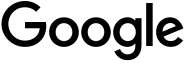
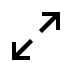
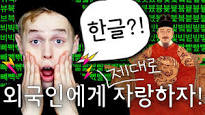
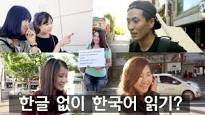
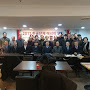
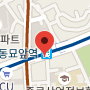
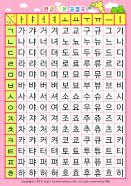
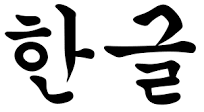
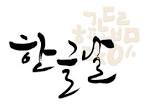
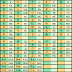
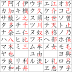
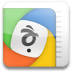

In [126]:
html.text

# str타입으로 잘 해석을 했어요.

In [127]:
# 속도떄문에 lxml많이 씀.
# dom tree로 만들기 위해 BeutifulSoup쓰기.

dom = BeautifulSoup(html.text, "lxml")


In [101]:
# BeautifulSoup 제일 최상위에 있는 root?

type(dom)


bs4.BeautifulSoup

[<a href="/search?q=%ED%95%9C%EA%B8%80&amp;gbv=1&amp;sei=r1FNW-q9F5OA-QaevoeYAQ">여기</a>,
 <a aria-expanded="false" class="gb_b gb_dc" data-ogsr-alt="" href="https://www.google.co.kr/intl/ko/options/" role="button" tabindex="0" title="Google 앱"></a>,
 <a class="gb_5f gb_Aa gb_Eb" href="https://accounts.google.com/ServiceLogin?hl=ko&amp;passive=true&amp;continue=https://www.google.co.kr/search%3Fq%3D%25ED%2595%259C%25EA%25B8%2580" id="gb_70" target="_top">로그인</a>,
 <a data-hveid="3" href="https://www.google.co.kr/webhp?hl=ko&amp;sa=X&amp;ved=0ahUKEwiq0andiKXcAhUTQN4KHR7fARMQPAgD" id="logo" title="Google 홈페이지로 이동"><img alt="Google" height="44" src="/images/branding/googlelogo/2x/googlelogo_color_120x44dp.png" width="120"/></a>,
 <a href="//support.google.com/websearch/answer/186645?hl=ko">자세히 알아보기</a>,
 <a class="duf3 aciXEb" data-async-trigger="duf3-46" data-ved="0ahUKEwiq0andiKXcAhUTQN4KHR7fARMQtw8IBQ" href="#" id="sbfblt" jsaction="async.u">부적절한 예상 검색어 신고</a>,
 <a class="q qs" href="/s
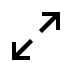

In [102]:
# css selector
# dom 트리에서 "a"태그찾기위해 css selector 쓰기.
# anchor 태그 찾기.
# "한글"로 검색했을 때의 검색결과도 있을거임. ex)"한글과 컴퓨터 다운로드" 등.

dom.select("a")

In [103]:
# div중에 class명이 rc인 것들 가져오기.
# 더좁히기 : div.rc 의 바로밑 자식노드 중에 h3태그 이름이 r인 태그에서의 링크 찾기.

aList = dom.select("div.rc > h3.r > a")
print(aList)

[<a href="http://www.hancom.com/downLoad.downPU.do" ping="/url?sa=t&amp;source=web&amp;rct=j&amp;url=http://www.hancom.com/downLoad.downPU.do&amp;ved=0ahUKEwiq0andiKXcAhUTQN4KHR7fARMQFgglMAA">다운로드 : 한글과컴퓨터 - Hancom</a>, <a href="https://www.hancom.com/product/productWindowsMain.do" ping="/url?sa=t&amp;source=web&amp;rct=j&amp;url=https://www.hancom.com/product/productWindowsMain.do&amp;ved=0ahUKEwiq0andiKXcAhUTQN4KHR7fARMQFggyMAE">Windows : 한글과컴퓨터 - Hancom</a>, <a href="https://namu.wiki/w/%ED%95%9C%EA%B8%80" ping="/url?sa=t&amp;source=web&amp;rct=j&amp;url=https://namu.wiki/w/%25ED%2595%259C%25EA%25B8%2580&amp;ved=0ahUKEwiq0andiKXcAhUTQN4KHR7fARMQFghEMAI">한글 - 나무위키</a>, <a href="https://ko.wikipedia.org/wiki/%ED%95%9C%EA%B8%80" ping="/url?sa=t&amp;source=web&amp;rct=j&amp;url=https://ko.wikipedia.org/wiki/%25ED%2595%259C%25EA%25B8%2580&amp;ved=0ahUKEwiq0andiKXcAhUTQN4KHR7fARMQFgh6MA0">한글 - 위키백과, 우리 모두의 백과사전</a>, <a href="https://ko.wikibooks.org/wiki/%ED%95%9C%EA%B5%AD%EC%96%B4_%EC%9E

In [104]:
for row in aList:
    print(row.attrs["href"])

http://www.hancom.com/downLoad.downPU.do
https://www.hancom.com/product/productWindowsMain.do
https://namu.wiki/w/%ED%95%9C%EA%B8%80
https://ko.wikipedia.org/wiki/%ED%95%9C%EA%B8%80
https://ko.wikibooks.org/wiki/%ED%95%9C%EA%B5%AD%EC%96%B4_%EC%9E%85%EB%AC%B8/%ED%95%9C%EA%B8%80_%EC%9E%90%EB%AA%A8
https://www.korean.go.kr/hangeul/principle/001.html
https://www1.president.go.kr/petitions/154276
http://www.kocca.kr/cop/bbs/view/B0000137/1833364.do?menuNo=200827&noticevent=Y
https://www.microsoft.com/ko-kr/download/details.aspx?id=36772


In [105]:
for link in aList:
    print(link["href"])

http://www.hancom.com/downLoad.downPU.do
https://www.hancom.com/product/productWindowsMain.do
https://namu.wiki/w/%ED%95%9C%EA%B8%80
https://ko.wikipedia.org/wiki/%ED%95%9C%EA%B8%80
https://ko.wikibooks.org/wiki/%ED%95%9C%EA%B5%AD%EC%96%B4_%EC%9E%85%EB%AC%B8/%ED%95%9C%EA%B8%80_%EC%9E%90%EB%AA%A8
https://www.korean.go.kr/hangeul/principle/001.html
https://www1.president.go.kr/petitions/154276
http://www.kocca.kr/cop/bbs/view/B0000137/1833364.do?menuNo=200827&noticevent=Y
https://www.microsoft.com/ko-kr/download/details.aspx?id=36772


In [106]:
# 위의 과정을 함수로 만들기.
# get방식일수도, post방식일수도잇어서 None으로 뒀다고???????????
# 몇회 반복할지 defaut값으로 2(최대 2번반복)를 줌.

def getUrl(url, params=None, num_retries=2):
    html = requests.get(url, params=params, headers=headers)
    
    # html 에러코드가 500~600 사이에 있거나, num_retries가 0보다 클때.
    # 다시 함수 호출. 재귀횟수는 3번으로 제한.
    if 500 <= html.status_code < 600 and num_retries > 0:
        print(html.status_code, html.reason)
        return getUrl(url, params, num_retries-1)
    
    # request에 성공하면, dom트리로 생성.
    dom = BeautifulSoup(html.text, "lxml")
    # a태그 가져오기
    links = dom.select("div.rc > h3.r > a")
    # a태그의 href속성 가져오기
    return [link["href"] for link in links]

In [107]:
links = getUrl(url, params)

In [108]:
links

['http://www.hancom.com/downLoad.downPU.do',
 'https://www.hancom.com/product/productWindowsMain.do',
 'https://namu.wiki/w/%ED%95%9C%EA%B8%80',
 'https://ko.wikipedia.org/wiki/%ED%95%9C%EA%B8%80',
 'https://ko.wikibooks.org/wiki/%ED%95%9C%EA%B5%AD%EC%96%B4_%EC%9E%85%EB%AC%B8/%ED%95%9C%EA%B8%80_%EC%9E%90%EB%AA%A8',
 'https://www.korean.go.kr/hangeul/principle/001.html',
 'https://www1.president.go.kr/petitions/154276',
 'http://www.kocca.kr/cop/bbs/view/B0000137/1833364.do?menuNo=200827&noticevent=Y',
 'https://www.microsoft.com/ko-kr/download/details.aspx?id=36772']

In [109]:
seed = "https://www.google.co.kr/search"
queue = [seed]

In [121]:
while queue:
    url = queue.pop()
    print(url)
    queue.extend(getUrl(url, params))
    print(queue)
    break

In [111]:
# seed가 다 끝날때까지 queue에 붙이기.
# queue가 비어있지 않으면 계속 함수 실행.

queue

['http://www.hancom.com/downLoad.downPU.do',
 'https://www.hancom.com/product/productWindowsMain.do',
 'https://namu.wiki/w/%ED%95%9C%EA%B8%80',
 'https://ko.wikipedia.org/wiki/%ED%95%9C%EA%B8%80',
 'https://ko.wikibooks.org/wiki/%ED%95%9C%EA%B5%AD%EC%96%B4_%EC%9E%85%EB%AC%B8/%ED%95%9C%EA%B8%80_%EC%9E%90%EB%AA%A8',
 'https://www.korean.go.kr/hangeul/principle/001.html',
 'https://www1.president.go.kr/petitions/154276',
 'http://www.kocca.kr/cop/bbs/view/B0000137/1833364.do?menuNo=200827&noticevent=Y',
 'https://www.microsoft.com/ko-kr/download/details.aspx?id=36772']

In [112]:
# 구글 외의 다른 사이트에서는 a태그만 가져오도록.

def getUrl(url, params=None, select="a", num_retries=2):
    html = requests.get(url, params=params, headers=headers)
    
    # html 에러코드가 500~600 사이에 있거나, num_retries가 0보다 클때.
    # 다시 함수 호출. 재귀횟수는 3번으로 제한.
    if 500 <= html.status_code < 600 and num_retries > 0:
        print(html.status_code, html.reason)
        return getUrl(url, params, num_retries-1)
    
    dom = BeautifulSoup(html.text, "lxml")
    links = dom.select(select)
    
    return [link["href"] for link in links if link.has_attr("href") == True]

In [120]:
select = "div.rc > h3.r > a"
print(url)
queue = getUrl(url, params, select)
result = list()
print(queue)

http://www.hancom.com/downLoad.downPU.do
[]


In [118]:
while queue:
    url = queue.pop()
    result.extend(getUrl(url, params))
    print(url, len(result))
    select = "a"